<a href="https://colab.research.google.com/github/Yumian-Cui/model-prediction/blob/main/Telco_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "10FpLYeuOyJ2faOAcjBsjWzFC3yZAU-w9"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('telco_churn') 

In [ ]:
import pandas as pd

df = pd.read_csv('telco_churn')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# SeniorCitizen: >= 60 years old
# Services that each customer has signed up for:
# – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

# Part I: Data exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
churn_df = pd.read_csv('telco_churn')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check the unique values for each column
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
categorical = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
for i in categorical:
  print (i, churn_df[i].unique())

PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
churn_df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
 churn_df["Churn"] = (churn_df["Churn"]=="Yes")*1 

In [ ]:
##churn_df.Churn.map(dict(yes=1, no=0)) 

In [ ]:
##churn_df['Churn'] = churn_df['Churn'] == 'Yes'
# report future error warning

In [ ]:
# Get target variable
# save target variable to y
y = churn_df['Churn']

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
y.shape

(7043,)

In [ ]:
# check the propotion of y = 1
# python package: imbalance-learn
print(y.sum() / y.shape[0] * 100)

26.536987079369588


### Part 1.2:  Understand the features

In [ ]:
# check missing values
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [ ]:
#churn_df["TotalCharges"] = churn_df["TotalCharges"].astype(object).astype(int)

In [ ]:
print (churn_df[pd.to_numeric(churn_df.TotalCharges, errors='coerce').isnull()])

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
488   4472-LVYGI  Female              0  ...          52.55                   0
753   3115-CZMZD    Male              0  ...          20.25                   0
936   5709-LVOEQ  Female              0  ...          80.85                   0
1082  4367-NUYAO    Male              0  ...          25.75                   0
1340  1371-DWPAZ  Female              0  ...          56.05                   0
3331  7644-OMVMY    Male              0  ...          19.85                   0
3826  3213-VVOLG    Male              0  ...          25.35                   0
4380  2520-SGTTA  Female              0  ...          20.00                   0
5218  2923-ARZLG    Male              0  ...          19.70                   0
6670  4075-WKNIU  Female              0  ...          73.35                   0
6754  2775-SEFEE    Male              0  ...          61.90                   0

[11 rows x 21 columns]


In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df.TotalCharges, errors='coerce')

In [ ]:
churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


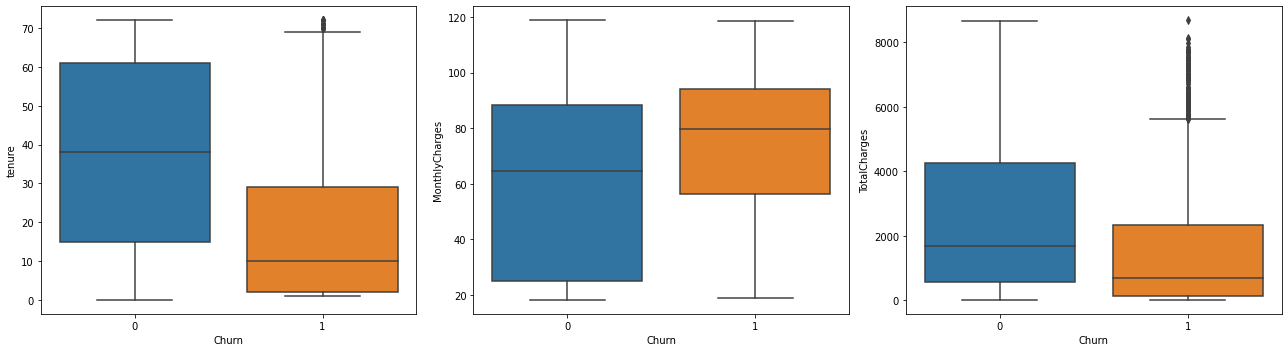

In [ ]:
# boxplot for numerical feature
f, axes = plt.subplots(1,3,figsize=(18,5))
sns.boxplot(x='Churn', y ='tenure', data=churn_df,ax=axes[0])
sns.boxplot(x='Churn', y ='MonthlyCharges', data=churn_df,ax=axes[1])
sns.boxplot(x='Churn', y ='TotalCharges', data=churn_df,ax=axes[2])
plt.tight_layout()

### Part 1.2:  Data Preprocessing

In [ ]:
'''PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']'''

"PhoneService ['No' 'Yes']\nMultipleLines ['No phone service' 'No' 'Yes']\nInternetService ['DSL' 'Fiber optic' 'No']\nOnlineSecurity ['No' 'Yes' 'No internet service']\nOnlineBackup ['Yes' 'No' 'No internet service']\nDeviceProtection ['No' 'Yes' 'No internet service']\nTechSupport ['No' 'Yes' 'No internet service']\nStreamingTV ['No' 'Yes' 'No internet service']\nStreamingMovies ['No' 'Yes' 'No internet service']\nContract ['Month-to-month' 'One year' 'Two year']\nPaperlessBilling ['Yes' 'No']\nPaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']"

In [ ]:
# encoding, binary

binary = ["Partner","Dependents","PaperlessBilling"]
 
for feature in binary:
  churn_df[feature] = (churn_df[feature]=="Yes")*1 

In [ ]:
churn_df['gender'] = churn_df['gender'] == 'Female'

In [ ]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,True,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,False,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,False,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,False,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,True,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,False,0,1,1,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,True,0,1,1,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,True,0,1,1,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,False,1,1,0,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
categorical2 = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies"]
for i in categorical2:
  churn_df[i].replace({"No phone service": "No", "No internet service": "No"}, inplace=True)
  churn_df[i] = (churn_df[i]=="Yes")*1 

In [ ]:
churn_df["PhoneService"] = (churn_df["PhoneService"]=="Yes")*1

In [ ]:
# one hot encoding - InternetService,Contract,PaymentMethod

churn_df = pd.get_dummies(churn_df, columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,True,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,False,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,False,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,False,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,True,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
# Get feature space by dropping useless feature
to_drop = ['customerID','Churn']
X = churn_df.drop(to_drop, axis=1)

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0
1,False,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0,1
2,False,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1
3,False,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0
4,True,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   bool   
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

##### detect that feature "TotalCharges" only has 7032 non null values, which means there're 11 Nan values needed to be filled. 
[link for further reference](https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression)

In [ ]:
X.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                 

In [ ]:
X.isnull().sum()["TotalCharges"]

11

In [ ]:
# regression imputation, using monthly charges to predict total charges
X.loc[X["TotalCharges"].isnull(),"TotalCharges"]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [ ]:
# add another column, like creating a copy so that we can safely edit on that copied one. 
#X["TotalCharges" + "_imp"] = X["TotalCharges"]

In [ ]:
# first fill the Nans of the TotalCharges_imp column
#X["Det" + "TotalCharges"] = X["TotalCharges" + "_imp"]

In [ ]:
import numpy as np

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    print (number_missing)
    observed_values = df.loc[df[feature].notnull(), feature]
    print (observed_values)
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    #print (df.loc[df[feature].isnull(), feature + '_imp'])
    
    return df

In [ ]:
X["TotalCharges" + '_imp'] = df["TotalCharges"]

In [ ]:
random_imputation(X,"TotalCharges")

11
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_imp
0,True,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0,29.85
1,False,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0,1,1889.5
2,False,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1,108.15
3,False,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0,1840.75
4,True,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,1,0,0,0,1,0,0,0,0,1,1990.5
7039,True,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,1,0,0,1,0,0,1,0,0,7362.9
7040,True,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,1,0,0,1,0,0,0,0,1,0,346.45
7041,False,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,0,1,0,1,0,0,0,0,0,1,306.6


In [ ]:
X["Det" + "TotalCharges"] = X["TotalCharges" + "_imp"]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X = X[["MonthlyCharges"]], y = X["TotalCharges_imp"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X.loc[X["TotalCharges"].isnull(), "Det" + "TotalCharges"] 

488      2727.8
753      792.15
936       39.25
1082     3183.4
1340     5817.7
3331     1135.7
3826    5426.85
4380    3440.25
5218    2419.55
6670     540.95
6754     3097.2
Name: DetTotalCharges, dtype: object

In [ ]:
model.predict(X[["MonthlyCharges"]])[X["TotalCharges"].isnull()]

array([1686.23362962,  105.67220635, 3071.05989212,  374.80805242,
       1857.5018953 ,   86.09869027,  355.23453634,   93.4387588 ,
         78.75862174, 2704.05646567, 2143.76456794])

In [ ]:
X.loc[X["TotalCharges"].isnull(), "Det" + "TotalCharges"] = model.predict(X[["MonthlyCharges"]])[X["TotalCharges"].isnull()]

In [ ]:
# first save the original TotalCharges Column

save_column = X["TotalCharges"]

In [ ]:
X_ = X

In [ ]:
#X["TotalCharges"] = X["DetTotalCharges"]
X = X.drop(["TotalCharges","TotalCharges_imp"],axis=1)

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DetTotalCharges
0,True,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,1,0,0,1,0,0,0,0,1,0,29.85
1,False,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1,0,0,0,1,0,0,0,0,1,1889.5
2,False,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,0,0,1,0,0,0,0,0,1,108.15
3,False,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1,0,0,0,1,0,1,0,0,0,1840.75
4,True,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,0,1,0,1,0,0,0,0,1,0,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1,0,0,0,1,0,0,0,0,1,1990.5
7039,True,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,0,1,0,0,1,0,0,1,0,0,7362.9
7040,True,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,1,0,0,1,0,0,0,0,1,0,346.45
7041,False,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,0,1,0,1,0,0,0,0,0,1,306.6


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [ ]:
# Splite data into training and testing
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 5282 observation with 26 features
test data has 1761 observation with 26 features


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Part 3.2: Model Training and Selection

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8103350369108461

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.80321665 0.79659413 0.80871212 0.79450758 0.79356061]
Model accuracy of Logistic Regression is 0.7993182176543103
[0.75780511 0.77388836 0.76136364 0.73579545 0.76041667]
Model accuracy of KNN is 0.7578538459333161
[0.78429518 0.78051088 0.79450758 0.77556818 0.77651515]
Model accuracy of Random Forest is 0.7822793927926377


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01,0.03,0.05,0.06,0.07,1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5) 
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.03, 0.05, 0.06, 0.07, 1, 5, 10),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
Grid_LR.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_tr

In [ ]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8013995800005734
Best parameters set:
C:0.05
penalty:l1


In [ ]:
best_LR_model = Grid_LR.best_estimator_
print (best_LR_model)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [ ]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.7707276167541067
Best parameters set:
n_neighbors:9


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_
print (best_KNN_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
parameters = {
    'n_estimators' : [35,40,45,50,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.7870111952065594
Best parameters set:
n_estimators:50


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_
print (best_RF_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


####Part 3.4: Model Evaluation: Accuracy, Precision, Recall

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm): # cm = confusion matrix
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))), 
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.7938671209540034
precision is: 0.6511627906976745
recall is: 0.4796573875802998

Logistic Regression
Accuracy is: 0.8057921635434412
precision is: 0.6582278481012658
recall is: 0.556745182012848

K nearest neighbor
Accuracy is: 0.7660420215786485
precision is: 0.562358276643991
recall is: 0.5310492505353319



#### ROC/AUC of logistic regression

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

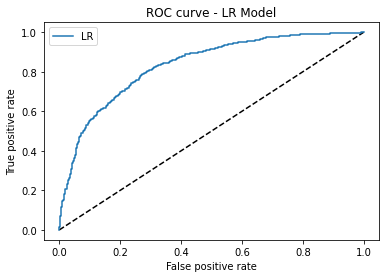

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8334927469559721

#### ROC/AUC of Random forest

In [ ]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1] # this is to get y_pred churning probablity 
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)

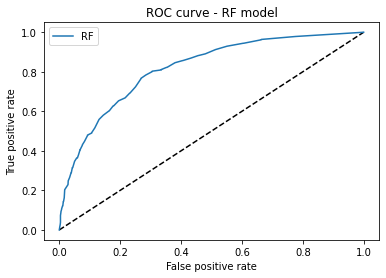

In [ ]:
# ROC curve of Random Forest result
plt.figure(1) # number identifier
plt.plot([0, 1], [0, 1], 'k--') # k -> black color, -- line style
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best') # legend location, 'best' default
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8163083445584793

#### ROC/AUC of KNN

In [ ]:
# Use predict_proba to get the probability results of Random Forest
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1] # this is to get y_pred churning probablity 
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

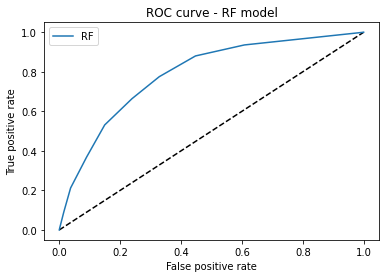

In [ ]:
# ROC curve of Random Forest result
plt.figure(1) # number identifier
plt.plot([0, 1], [0, 1], 'k--') # k -> black color, -- line style
plt.plot(fpr_knn, tpr_knn, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best') # legend location, 'best' default
plt.show()

In [ ]:
metrics.auc(fpr_knn,tpr_knn)

0.7877735819082639

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DetTotalCharges
0,True,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,1,0,0,1,0,0,0,0,1,0,29.85
1,False,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1,0,0,0,1,0,0,0,0,1,1889.5
2,False,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,0,0,1,0,0,0,0,0,1,108.15
3,False,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1,0,0,0,1,0,1,0,0,0,1840.75
4,True,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,0,1,0,1,0,0,0,0,1,0,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1,0,0,0,1,0,0,0,0,1,1990.5
7039,True,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,0,1,0,0,1,0,0,1,0,0,7362.9
7040,True,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,1,0,0,1,0,0,0,0,1,0,346.45
7041,False,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,0,1,0,1,0,0,0,0,0,1,306.6


In [ ]:
'''Best score: 0.8013995800005734
Best parameters set:
C:0.05
penalty:l1'''

'''Logistic Regression
Accuracy is: 0.8057921635434412
precision is: 0.6582278481012658
recall is: 0.556745182012848'''

# AUC score: 0.8334927469559721

In [ ]:
np.random.seed()
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.05, solver='liblinear', random_state=42)
LRmodel_l1.fit(X_l1, y)
LRmodel_l1.coef_[0]

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
tenure : -0.7886
InternetService_Fiber optic : 0.4327
Contract_Month-to-month : 0.3391
InternetService_No : -0.305
Contract_Two year : -0.2185
PaymentMethod_Electronic check : 0.1606
PaperlessBilling : 0.1522
OnlineSecurity : -0.1465
TechSupport : -0.1321
StreamingMovies : 0.1179
MultipleLines : 0.1131
PhoneService : -0.1102
StreamingTV : 0.1099
SeniorCitizen : 0.0729
Dependents : -0.0626
OnlineBackup : -0.0327
PaymentMethod_Credit card (automatic) : -0.0097
Partner : 0.0
DetTotalCharges : 0.0
DeviceProtection : 0.0
PaymentMethod_Mailed check : 0.0
MonthlyCharges : 0.0
InternetService_DSL : 0.0
Contract_One year : 0.0
PaymentMethod_Bank transfer (automatic) : 0.0
gender : 0.0
